# ЦИФРОВОЙ ПРОРЫВ 2022

> Чемпионат в Новосибирской области



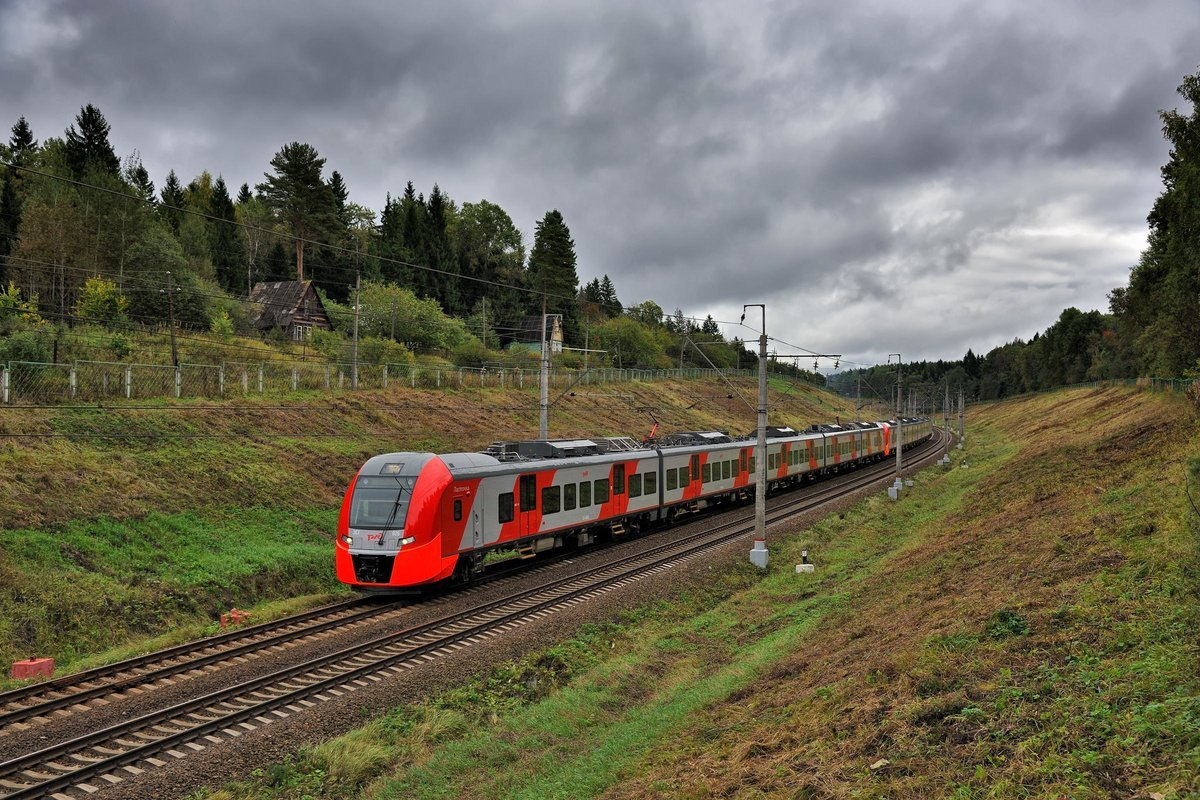


Российский железнодорожный комплекс — один из крупнейших в
мире. Общая протяженность эксплуатационной длины железнодорожных
путей превышает 120 тысяч километров. В прошлом году в нашей стране
поезда и электрички перевезли более 1 миллиарда пассажиров. Именно
поэтому к проектированию и эксплуатации железнодорожной
инфраструктуры предъявляются высокие требования по обеспечению
безопасности.

---



«Классификация опор контактной сети и других
объектов в массиве точек лазерных отражений для
обеспечения безопасности движения железнодорожного транспорта»

**Задача: создать модель, которая сможет прогнозировать класс ТЛО с использованием параметров данной точки.**


> В связи с совершенствованием технологий геодезической съемки, инновационным решением при диагностике, строительстве и эксплуатации железнодорожных путей и придорожной инфраструктуры является построение цифровых моделей пути (ЦМП) на основе данных лазерного сканирования.

> Результат лазерного сканирования — это высокоточный массив точек лазерных отражений (ТЛО), на основе которого проводятся все необходимые измерения и последующий анализ данных. Определение опор контактной сети (ОКС) в массиве ТЛО — это одна из обязательных подзадач процесса определения габаритов приближения подвижного состава к ОКС.

> В настоящий момент определение взаимного расположения объектов железнодорожной инфраструктуры происходит при натурном обследовании — в связи с чем высок риск получения недостоверной информации, что критично для обеспечения безопасности движения.


---



**Описание входных значений:**

**train.csv** — файл, содержащий данные для тренировки. 

*Структура датасета:*
- Параметр «id» — уникальный идентификатор ТЛО.
- Параметр «Easting» — направление на восток, условная координата Х
ТЛО в метрах
- Параметр «Northing» — направление на север, условная координата У
ТЛО в метрах
- Параметр «Height» — отметка (высота), условная координата Н ТЛО в
метрах
- Параметр «Reflectance» — отражательная способность ТЛО
- Параметр «Class» — признак класса точки

**test.csv** - содержит данные ТЛО для предсказания

**Пояснение к данным:**

Столбец «Class» хранит в себе тип класса точки, где:

0 – точки земли

1 – точки опор

3 – точки растительности

4 – точки рельсов

5 – точки элементов контактной сети

64 – точки шумов

**Метрика**

В качестве метрики выступает Recall по столбцу Class.

# Загрузка библиотек и данных

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('../train_dataset_train.csv')
df.head(5)

,id,Easting,Northing,Height,Reflectance,Class
0,2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
1,3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2,2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
3,2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4,4608150,431720.0914,6.032288e+06,67.3252,-9.10,0


In [ ]:
df_test = pd.read_csv('../test_dataset_test.csv')
df_test.head(5)

,id,Easting,Northing,Height,Reflectance
0,1836965,431754.6192,6.032265e+06,69.2608,-13.99
1,3659389,431654.4141,6.032344e+06,68.0129,-10.99
2,5433033,431686.8574,6.032334e+06,69.2442,-10.26
3,1168709,431711.5747,6.032293e+06,69.6617,-8.25
4,5821779,431728.5806,6.032315e+06,67.6753,-7.56


In [ ]:
# размер данных
df.shape, df_test.shape

((4222094, 6), (1809469, 5))

In [ ]:
# общее описание
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222094 entries, 0 to 4222093
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   Easting      float64
 2   Northing     float64
 3   Height       float64
 4   Reflectance  float64
 5   Class        int64  
dtypes: float64(4), int64(2)
memory usage: 193.3 MB


In [ ]:
# проверка на дубликаты
df.duplicated().sum(), df_test.duplicated().sum() 

(0, 0)

In [ ]:
# проверка на пропуски
for i in df.columns:
  print(df[i].isna().sum())

0
0
0
0
0
0


In [ ]:
for i in df_test.columns:
  print(df_test[i].isna().sum())

0
0
0
0
0


Удалим колонку id, так как она ни на что не влияет

In [ ]:
df.drop('id',axis='columns',inplace=True)
df.head()

,Easting,Northing,Height,Reflectance,Class
0,431696.5375,6.032319e+06,69.2226,-11.14,0
1,431710.3835,6.032291e+06,68.9711,-15.16,3
2,431696.8099,6.032322e+06,69.2453,-13.59,0
3,431680.4542,6.032343e+06,69.1892,-11.21,0
4,431720.0914,6.032288e+06,67.3252,-9.10,0


In [ ]:
df.shape, df_test.shape

((4222094, 5), (1809469, 4))

In [ ]:
df.describe()

,Easting,Northing,Height,Reflectance,Class
count,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06
mean,4.317068e+05,6.032308e+06,6.940159e+01,-1.053063e+01,1.155633e+00
std,2.977279e+01,2.981495e+01,2.269884e+00,4.515277e+00,2.535087e+00
min,4.316294e+05,6.032232e+06,6.041440e+01,-3.796000e+01,0.000000e+00
25%,4.316825e+05,6.032284e+06,6.779070e+01,-1.263000e+01,0.000000e+00
50%,4.317069e+05,6.032307e+06,6.920490e+01,-9.940000e+00,0.000000e+00
75%,4.317308e+05,6.032332e+06,6.929940e+01,-7.730000e+00,3.000000e+00
max,4.317812e+05,6.032384e+06,1.337185e+02,4.360000e+00,6.400000e+01


In [ ]:
df_test.describe()

,id,Easting,Northing,Height,Reflectance
count,1.809469e+06,1.809469e+06,1.809469e+06,1.809469e+06,1.809469e+06
mean,3.017115e+06,4.317068e+05,6.032308e+06,6.940211e+01,-1.053247e+01
std,1.740939e+06,2.978739e+01,2.981733e+01,2.269805e+00,4.523283e+00
min,1.205000e+03,4.316296e+05,6.032232e+06,6.058370e+01,-3.770000e+01
25%,1.508726e+06,4.316825e+05,6.032284e+06,6.779210e+01,-1.263000e+01
50%,3.017950e+06,4.317069e+05,6.032307e+06,6.920500e+01,-9.940000e+00
75%,4.524423e+06,4.317308e+05,6.032332e+06,6.929940e+01,-7.730000e+00
max,6.032765e+06,4.317812e+05,6.032384e+06,1.158224e+02,3.040000e+00


In [ ]:
df['Class'].unique()

array([ 0,  3,  4,  5,  1, 64])

In [ ]:
import seaborn as sns

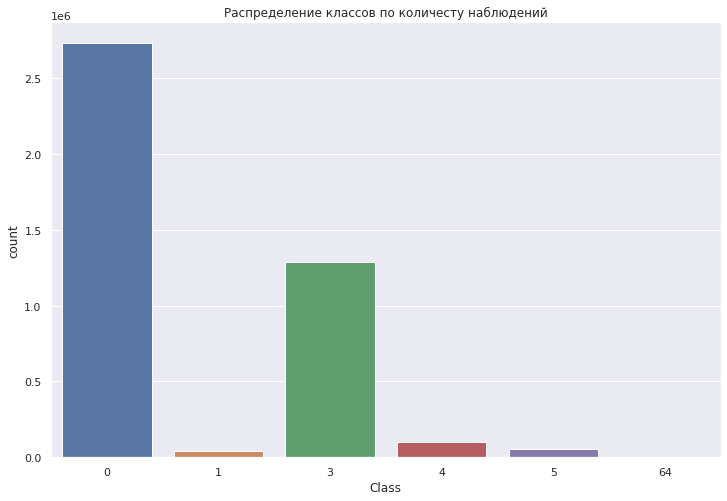

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x="Class", data=df).set_title('Распределение классов по количесту наблюдений');

0 – точки земли

1 – точки опор

3 – точки растительности

4 – точки рельсов

5 – точки элементов контактной сети

64 – точки шумов

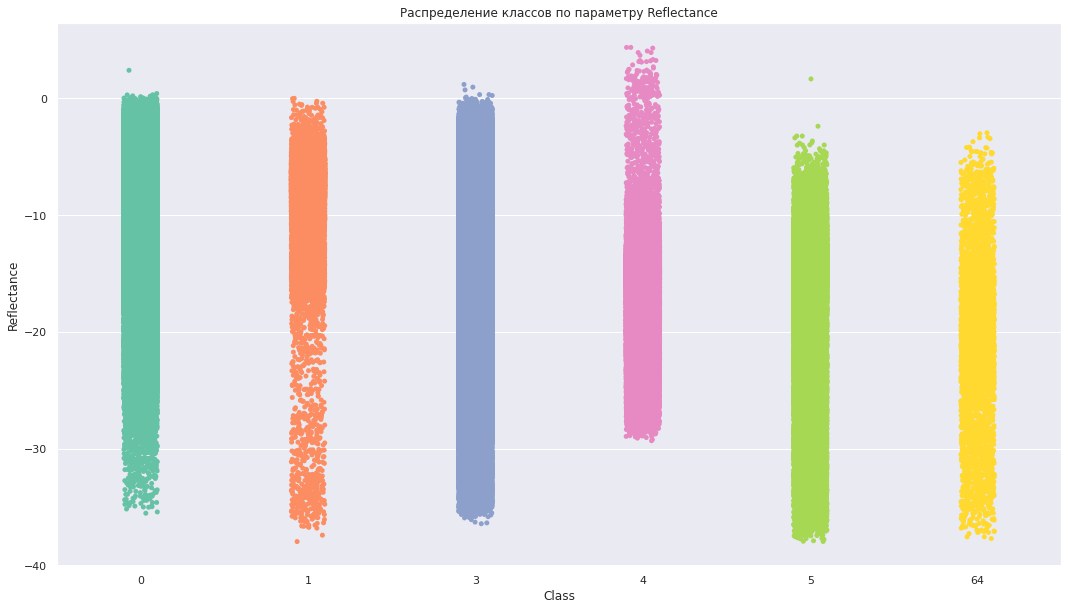

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df, x= "Class", y = "Reflectance", palette="Set2", dodge=True).set_title('Распределение классов по параметру Reflectance');

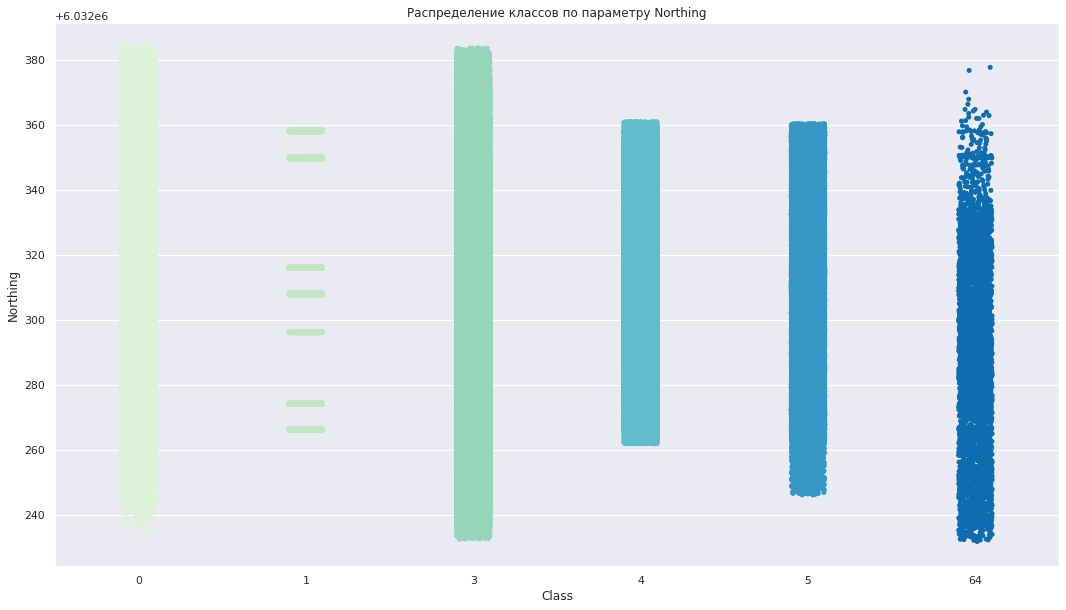

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df, x= "Class", y = "Northing", palette="GnBu", dodge=True).set_title('Распределение классов по параметру Northing');

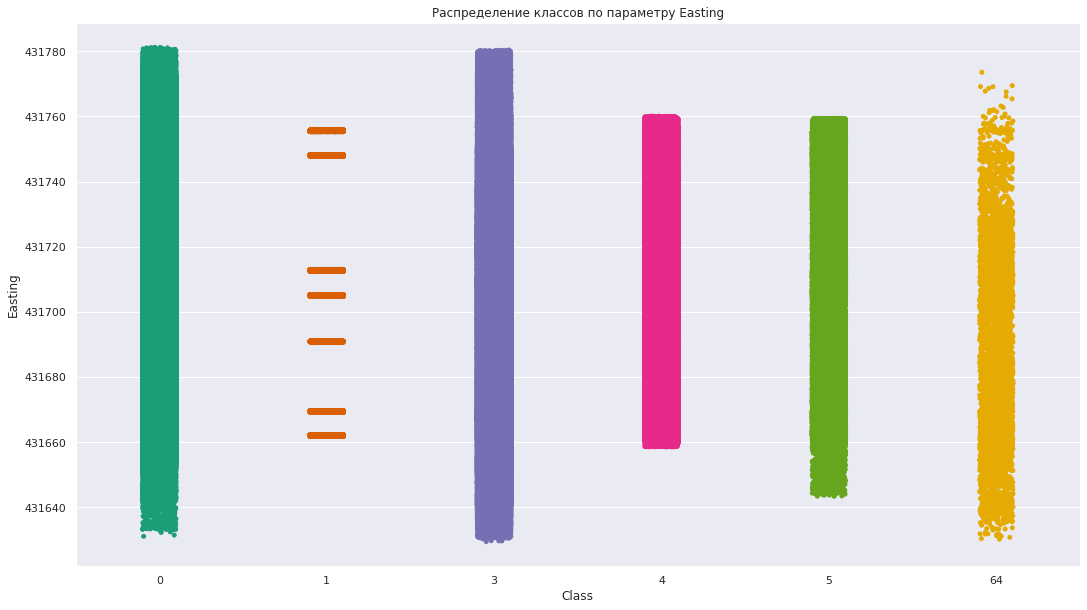

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df, x="Class", y="Easting", palette="Dark2", dodge=True).set_title('Распределение классов по параметру Easting');

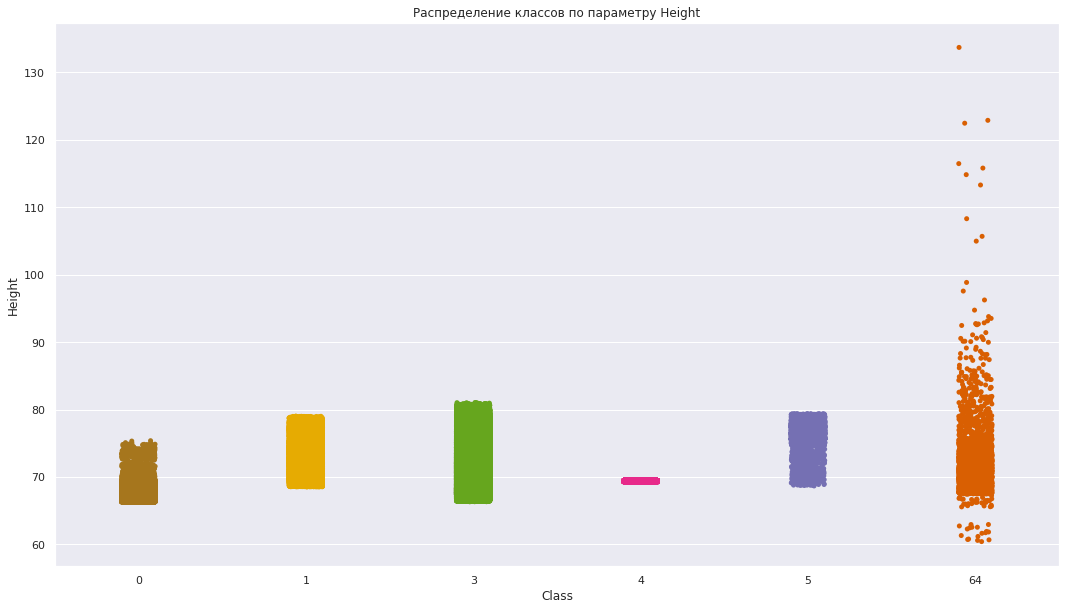

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df, x= "Class", y = "Height", palette="Dark2_r", dodge=True).set_title('Распределение классов по параметру Height');

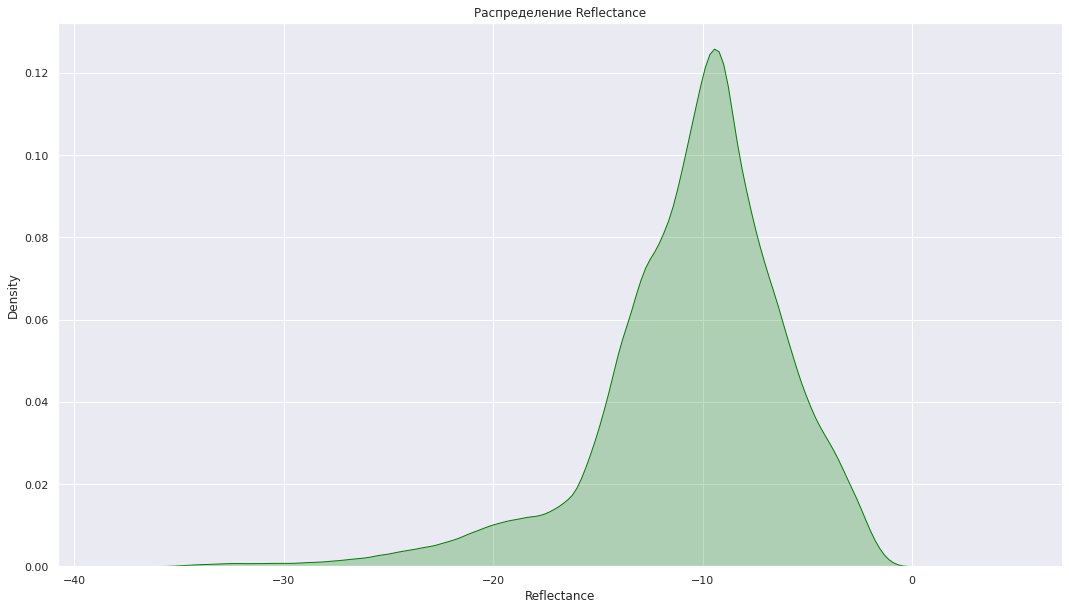

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.kdeplot(data=df, x="Reflectance", shade=True , color="Green").set_title('Распределение Reflectance');

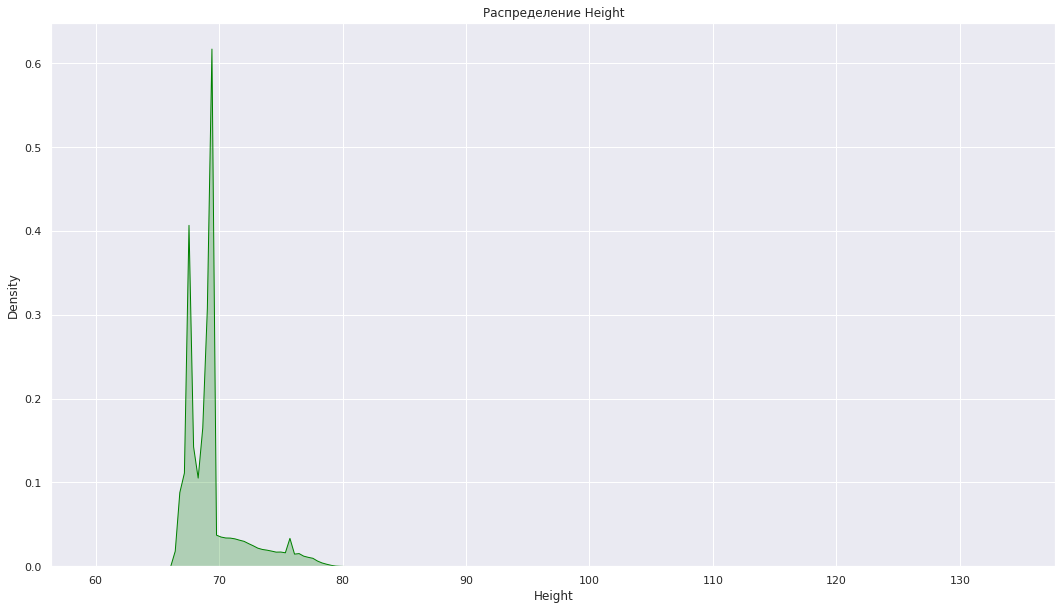

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.kdeplot(data=df, x="Height", shade=True , color="Green").set_title('Распределение Height');

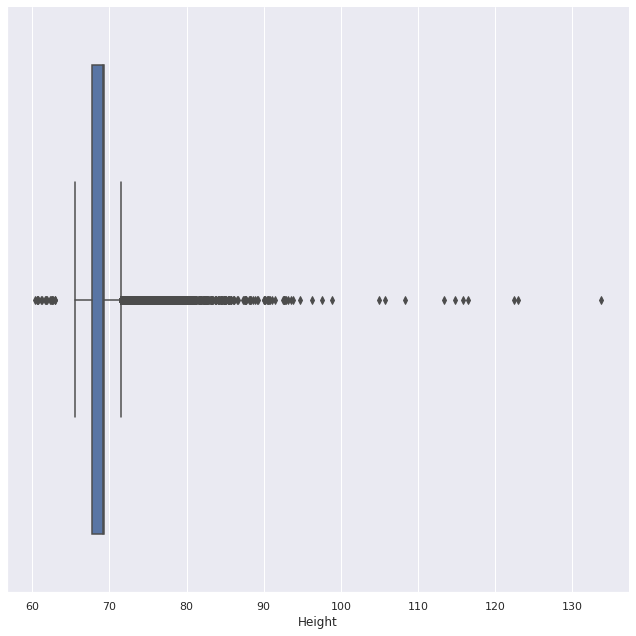

In [ ]:
sns.catplot(data=df, x="Height", kind="box",height=9)

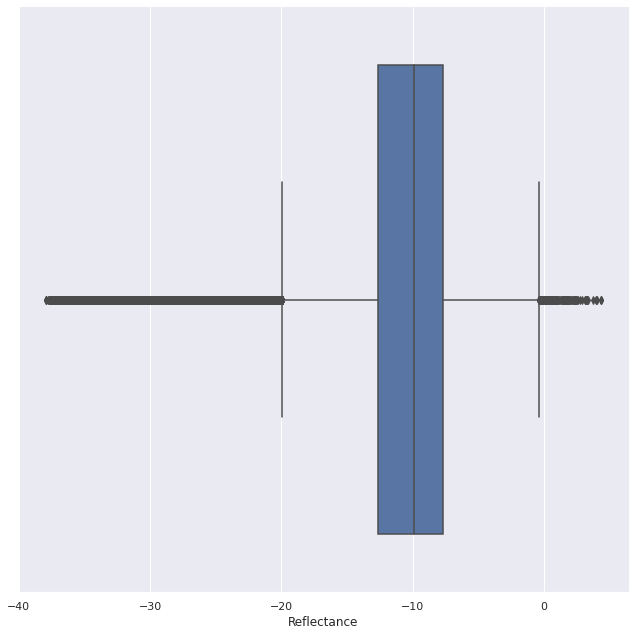

In [ ]:
sns.catplot(data=df, x="Reflectance", kind="box", height=9)

              Easting  Northing    Height  Reflectance     Class
Easting      1.000000 -0.731936 -0.201393     0.055291 -0.114639
Northing    -0.731936  1.000000 -0.256841     0.143781 -0.149172
Height      -0.201393 -0.256841  1.000000    -0.285061  0.339699
Reflectance  0.055291  0.143781 -0.285061     1.000000 -0.221125
Class       -0.114639 -0.149172  0.339699    -0.221125  1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

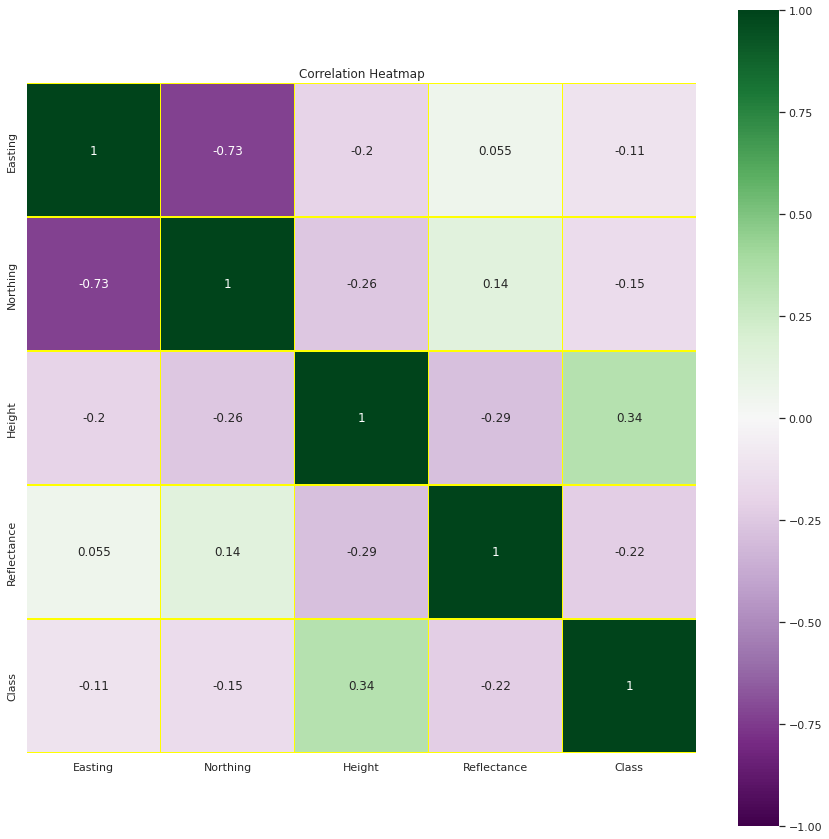

In [ ]:
plt.rcParams['figure.figsize']=(15,15)
print(df.corr())
linewidths = 0.5
linecolor = "yellow"
g = sns.heatmap(df.corr(),square=True,annot=True,linewidths=linewidths,cmap='PRGn',
                linecolor=linecolor, vmin=-1, vmax=1, center= 0)
g.set_title('Correlation Heatmap')

**Выводы:**
- Между признаками наблюдаются как положительные, так и отрицательные линейные взаимосвязи;
- Имеется дисбаланс в целевом признаке - в классе;
- Имеются выбросы в таких признаках, как "Reflectance" и "Height".

# Preprocessing & Feature engineering

In [ ]:
df['EN'] = (df['Easting'] + df['Northing'])
df_test['EN'] = (df_test['Easting'] + df_test['Northing'])

In [ ]:
df.head(5)

,Easting,Northing,Height,Reflectance,Class,EN
0,431696.5375,6.032319e+06,69.2226,-11.14,0,6.464016e+06
1,431710.3835,6.032291e+06,68.9711,-15.16,3,6.464001e+06
2,431696.8099,6.032322e+06,69.2453,-13.59,0,6.464019e+06
3,431680.4542,6.032343e+06,69.1892,-11.21,0,6.464023e+06
4,431720.0914,6.032288e+06,67.3252,-9.10,0,6.464008e+06


In [ ]:
df_test.head(5)

,id,Easting,Northing,Height,Reflectance,EN
0,1836965,431754.6192,6.032265e+06,69.2608,-13.99,6.464019e+06
1,3659389,431654.4141,6.032344e+06,68.0129,-10.99,6.463999e+06
2,5433033,431686.8574,6.032334e+06,69.2442,-10.26,6.464021e+06
3,1168709,431711.5747,6.032293e+06,69.6617,-8.25,6.464004e+06
4,5821779,431728.5806,6.032315e+06,67.6753,-7.56,6.464043e+06


In [ ]:
df['ENH'] = (df['Easting'] + df['Northing'] + df['Height'])
df_test['ENH'] = (df_test['Easting'] + df_test['Northing'] + df_test['Height'])

In [ ]:
df.head(5)

,Easting,Northing,Height,Reflectance,Class,EN,ENH
0,431696.5375,6.032319e+06,69.2226,-11.14,0,6.464016e+06,6.464085e+06
1,431710.3835,6.032291e+06,68.9711,-15.16,3,6.464001e+06,6.464070e+06
2,431696.8099,6.032322e+06,69.2453,-13.59,0,6.464019e+06,6.464089e+06
3,431680.4542,6.032343e+06,69.1892,-11.21,0,6.464023e+06,6.464092e+06
4,431720.0914,6.032288e+06,67.3252,-9.10,0,6.464008e+06,6.464075e+06


# Building Model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import plot_confusion_matrix

In [ ]:
X = df.drop(['Class'], axis = 1)
y = df[['Class']]
# Переименуем класс 64 в класс 2
y.Class = y.Class.map(lambda x: 2 if x == 64 else x)
y.Class.unique()

array([0, 3, 4, 5, 1, 2])

In [ ]:
X

,Easting,Northing,Height,Reflectance,EN,ENH
0,431696.5375,6.032319e+06,69.2226,-11.14,6.464016e+06,6.464085e+06
1,431710.3835,6.032291e+06,68.9711,-15.16,6.464001e+06,6.464070e+06
2,431696.8099,6.032322e+06,69.2453,-13.59,6.464019e+06,6.464089e+06
3,431680.4542,6.032343e+06,69.1892,-11.21,6.464023e+06,6.464092e+06
4,431720.0914,6.032288e+06,67.3252,-9.10,6.464008e+06,6.464075e+06
...,...,...,...,...,...,...
4222089,431721.6917,6.032297e+06,69.2220,-9.21,6.464018e+06,6.464088e+06
4222090,431684.7126,6.032323e+06,67.5003,-9.52,6.464007e+06,6.464075e+06
4222091,431735.0991,6.032293e+06,68.9625,-10.30,6.464028e+06,6.464097e+06
4222092,431702.1040,6.032318e+06,69.2873,-9.94,6.464020e+06,6.464089e+06


In [ ]:
final_test = df_test.drop(['id'], axis = 1)
final_test

In [ ]:
def get_scaled_data(train, test):
  rob = RobustScaler()
  train = rob.fit_transform(train)
  test = rob.transform(test)
  return train, test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5,stratify=y)

In [ ]:
X_train.shape, X_test.shape

((3377675, 6), (844419, 6))

In [ ]:
y_train.value_counts()

Class
0        2184832
3        1030253
4          82762
5          44788
1          31507
2           3533
dtype: int64

In [ ]:
X_train, X_test = get_scaled_data(X_train, X_test)

In [ ]:
X_train

array([[ 0.44328304, -0.51028108, -1.14948932,  0.23265306, -0.3329937 ,
        -0.40894398],
       [-0.35567294, -0.59930683,  5.86649423,  0.59387755, -2.12996553,
        -1.73468709],
       [-0.45097432,  0.70292175, -0.12654198,  0.17142857,  0.32558052,
         0.29951822],
       ...,
       [-0.3775962 , -0.27802943,  2.28863244, -0.10612245, -1.52093554,
        -1.35968144],
       [-0.24258626, -0.2856704 ,  0.65340231,  0.46530612, -1.26341124,
        -1.20869015],
       [ 1.31672832, -0.42753759, -0.75116063, -1.38571429,  1.60186   ,
         1.51102595]])

In [ ]:
X_test

array([[-0.4209576 ,  0.51474691,  0.03826767,  0.31428571,  0.00360596,
        -0.00566803],
       [-1.34372036,  0.64032601, -0.71123491, -1.96326531, -1.60733603,
        -1.63009558],
       [ 0.96579039, -0.89880973,  0.02911527, -0.77755102, -0.0663371 ,
        -0.07474812],
       ...,
       [-0.04654364,  0.24454401, -0.00510678, -0.62244898,  0.21137219,
         0.19516493],
       [ 0.72477763, -0.75443541, -0.69936331,  0.11632653, -0.26018684,
        -0.30974942],
       [ 0.33453125,  0.00450087, -0.66023345, -0.55714286,  0.49394534,
         0.43139019]])

In [ ]:
def get_weights(y_train):
  classes = np.unique(y_train)
  weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train.values.reshape(-1))
  class_weights = dict(zip(classes, weights))
  return class_weights

In [ ]:
cls_weights = get_weights(y_train)

In [ ]:
cls_weights

{0: 0.2576609246538559,
 1: 17.86732577945642,
 2: 159.33932446457212,
 3: 0.5464151362173498,
 4: 6.801984405081237,
 5: 12.569121937423715}

In [ ]:
%%time
boost_model = CatBoostClassifier(iterations=200,loss_function='MultiClass', bootstrap_type='Bernoulli', depth=6, 
                                 verbose=50, class_weights=cls_weights)
model = boost_model.fit(X_train, y_train)

Learning rate set to 0.466565
0:	learn: 0.6765895	total: 2.12s	remaining: 7m 1s
50:	learn: 0.1126802	total: 1m 39s	remaining: 4m 49s
100:	learn: 0.0789634	total: 3m 13s	remaining: 3m 10s
150:	learn: 0.0663288	total: 4m 40s	remaining: 1m 31s
199:	learn: 0.0587335	total: 6m 8s	remaining: 0us
CPU times: user 11min 11s, sys: 2.78 s, total: 11min 14s
Wall time: 6min 10s


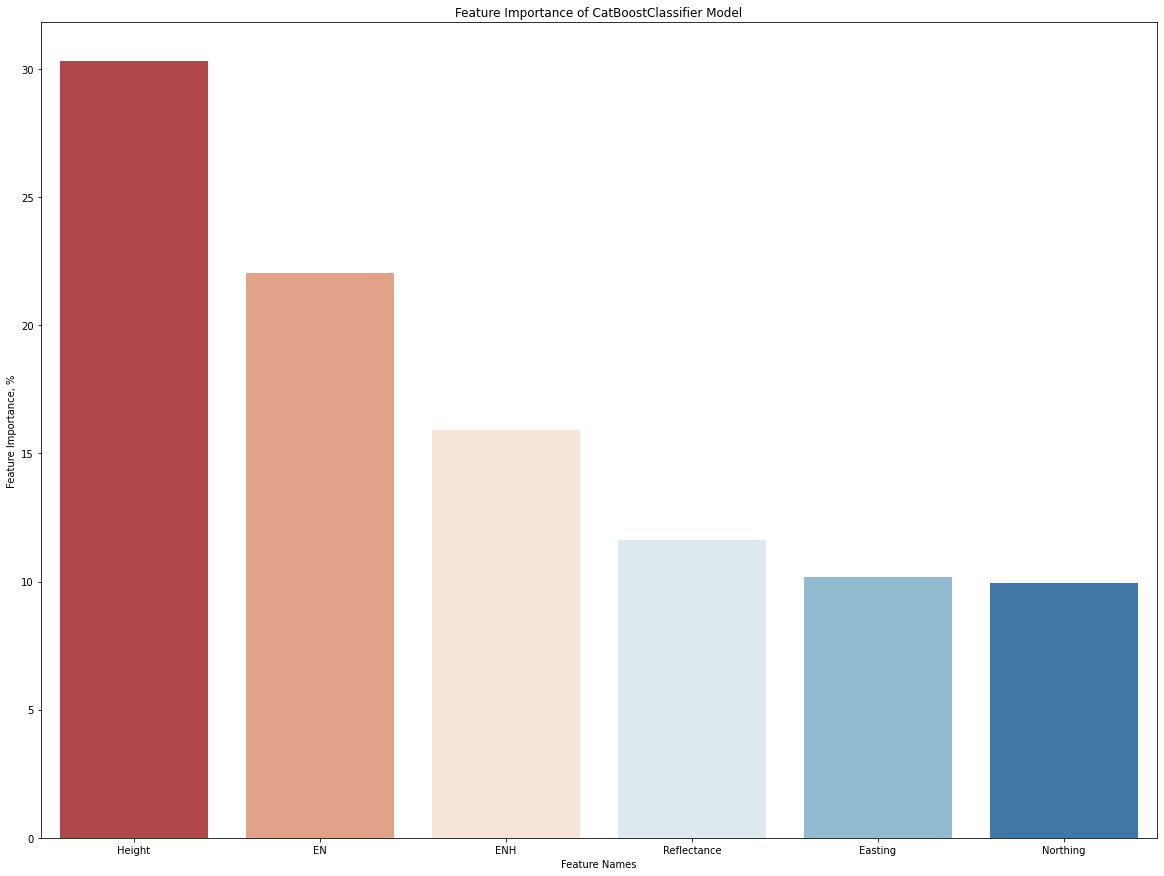

In [ ]:
def plot_important_features(ft_import, names, model):
  f_importance = np.array(ft_import)
  f_names = np.array(names)
  d = {'feature_importance': f_importance, 'feature_names': f_names}
  df = pd.DataFrame(d)
  df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
  plt.figure(figsize=[20,15])
  sns.barplot(x=df['feature_names'], y=df['feature_importance'], palette='RdBu')
  plt.xlabel('Feature Names')
  plt.ylabel('Feature Importance, %')
  plt.title(f'Feature Importance of {model} Model')
  plt.show()

plot_important_features(model.get_feature_importance(), X.columns, 'CatBoostClassifier')

In [ ]:
y_predictions = model.predict(X_test, prediction_type="Class")
y_predictions[:10].flatten()

array([0, 0, 0, 0, 5, 0, 5, 4, 2, 0])

In [ ]:
np.array(y_test[:10]).reshape(-1)

array([0, 0, 0, 3, 5, 0, 5, 4, 0, 0])

In [ ]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    546208
           1       0.94      0.99      0.96      7877
           2       0.10      0.94      0.18       883
           3       0.96      0.95      0.95    257563
           4       0.79      1.00      0.88     20691
           5       1.00      0.99      0.99     11197

    accuracy                           0.96    844419
   macro avg       0.79      0.97      0.82    844419
weighted avg       0.97      0.96      0.96    844419



In [ ]:
print('Recall по валидационным данным:', recall_score(y_test, y_predictions, average='macro', zero_division=True))

Recall по валидационным данным: 0.972288573476367


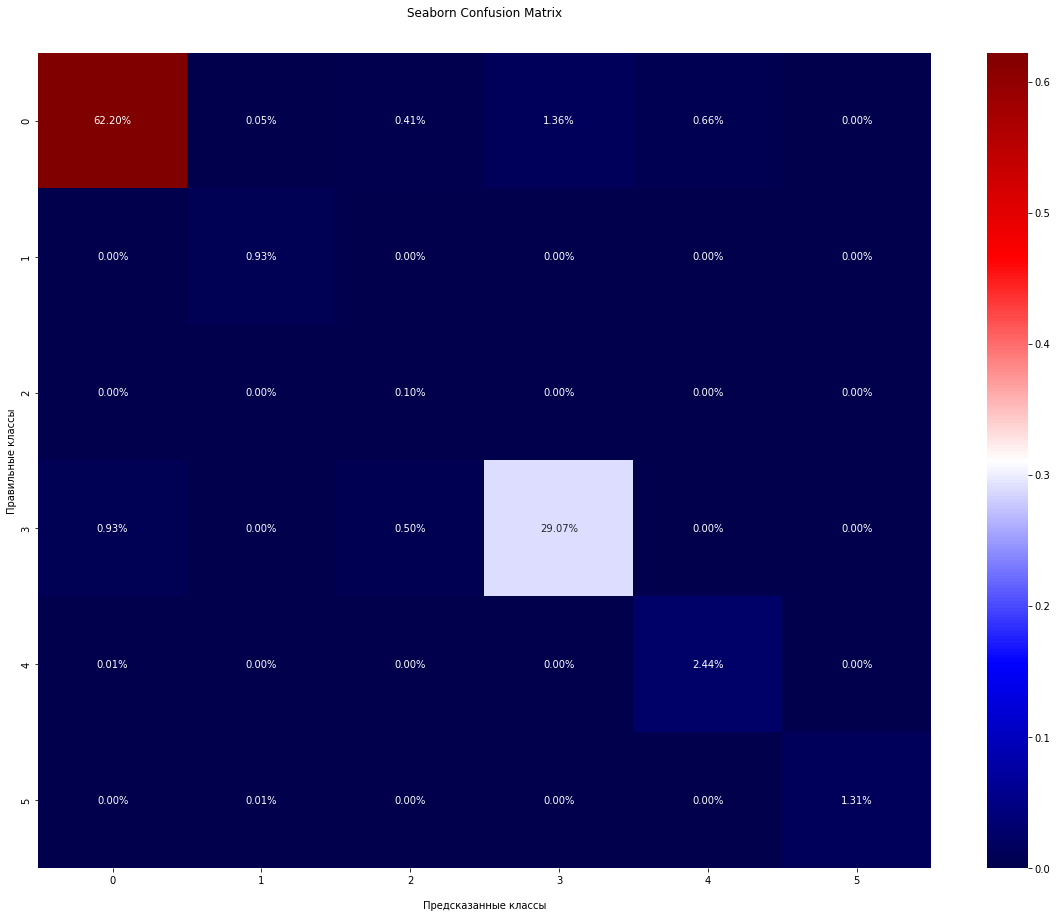

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_predictions)

plt.figure(figsize=[20,15])
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='seismic')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nПредсказанные классы')
ax.set_ylabel('Правильные классы');

plt.show()

In [ ]:
import pickle
with open('model_CatBoostClassifier.pickle', 'wb') as f:
  pickle.dump(model, f)

# Submit

In [ ]:
rob = RobustScaler()
final_test = rob.fit_transform(final_test)

In [ ]:
test = model.predict(final_test)

In [ ]:
submit = pd.read_csv('../example/sample_solution.csv')
submit['Class'] = test
submit['Class'] = submit['Class'].astype('int32')
submit['Class'] = submit['Class'].map(lambda x: 64 if x == 2 else x)
submit.to_csv('submit_catboost_clf.csv', index=False)

Предсказание обучающей выборки

In [ ]:
X = rob.fit_transform(X)

In [ ]:
%%time
y_pred_tr = model.predict(X)

CPU times: user 9.48 s, sys: 335 ms, total: 9.82 s
Wall time: 6.22 s


In [ ]:
print('Recall по всей выборке:', recall_score(y, y_pred_tr, average='macro', zero_division=True))

Recall по всей выборке: 0.9792893131985568


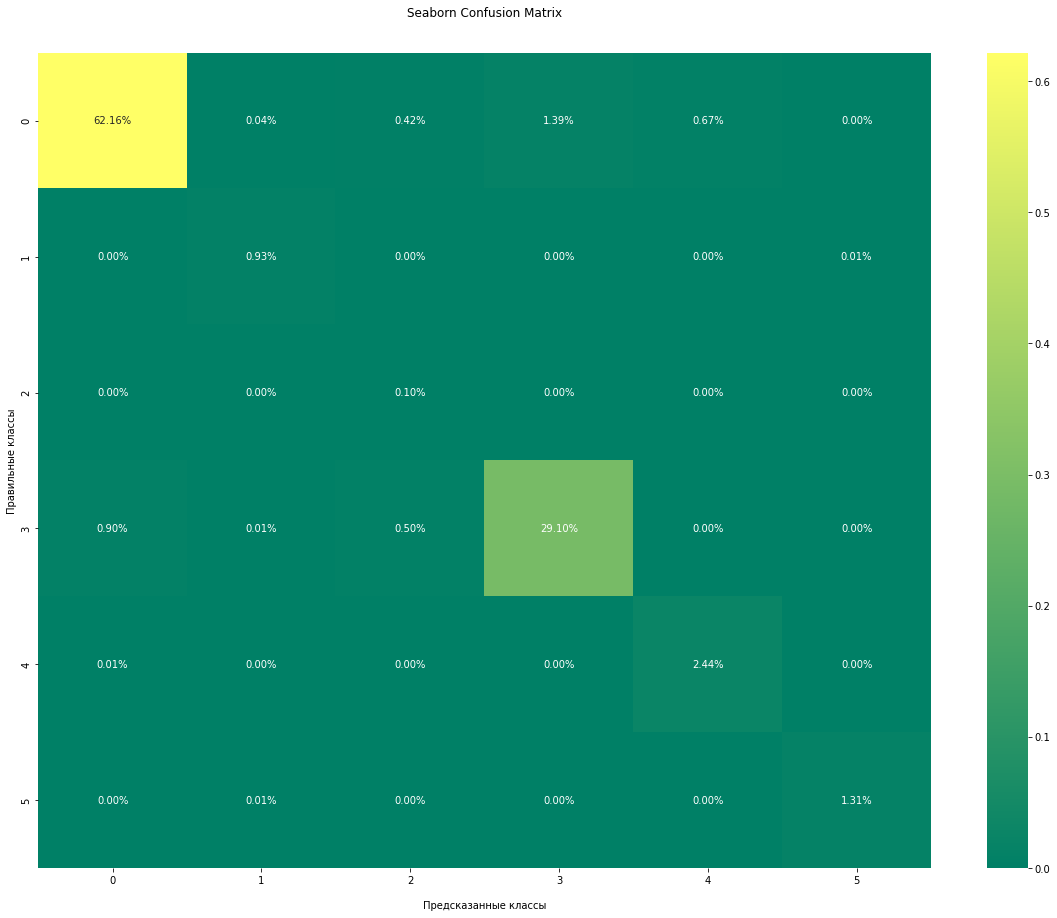

In [ ]:
cf_matrix = confusion_matrix(y, y_pred_tr)

plt.figure(figsize=[20,15])
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='summer')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nПредсказанные классы')
ax.set_ylabel('Правильные классы');

plt.show()

# Заключение

Добавленные признаки повышают точность модели

Были использованы следующией модели: CatBoost, XGBoost, SVM, KNN. Лучший результат показала модель CatBoost с параметрами: iterations = 200 loss_function = MultiClass, bootstrap_type = Bernoulli, depth = 6.

Так как датасет достаточно большой и имеется дисбаланс в целевых данных, было решено вычислить веса для каждого класса с помощью compute_class_weight из sklearn (т.е. придаем больший вес классу меньшинства и меньший вес классу большинства).

По Confusion Matrix (предсказание по валидации) точки опор (класс 1) и точки элементов контактной сети (класс 5) предсказываются на более, чем 90%. Имеется неточность предсказаний точек рельсов (класс 4) и земли (класс 0), что, возможно, связано с их налажением друг на друга в облаке ТЛО. Но основные неточности возникают между точками земли (класс 0) и точками растительности (класс 3), что не выглядит критично.